In [1]:

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd

# Load each year's CSV
df = pd.read_csv(r"C:\Users\sharg\Desktop\uyga vazifa\unsupervised learning\3-oy\final\Climate YEOSU\data\Feature_Selection\yeosu_weather_selected.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7183 entries, 0 to 7182
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         7183 non-null   int64  
 1   Maximum Temperature (°C)    7183 non-null   float64
 2   Minimum Temperature (°C)    7183 non-null   float64
 3   Atmospheric Pressure (hPa)  7183 non-null   float64
 4   Relative Humidity (%)       7183 non-null   float64
 5   Precipitation (mm)          7183 non-null   float64
 6   Visibility (km)             7183 non-null   float64
 7   Wind Speed (km/h)           7183 non-null   float64
 8   Max Sustained Wind (km/h)   7183 non-null   float64
 9   Month                       7183 non-null   int64  
 10  Year                        7183 non-null   int64  
 11  Date                        7183 non-null   int64  
 12  Day_of_Week_FE              7183 non-null   int64  
 13  Day_of_Year_FE              7183 

In [3]:
missing = df.isna().sum()
print(missing[missing > 0])


Series([], dtype: int64)


In [4]:
print(df.dtypes.value_counts())


float64    21
int64       7
Name: count, dtype: int64


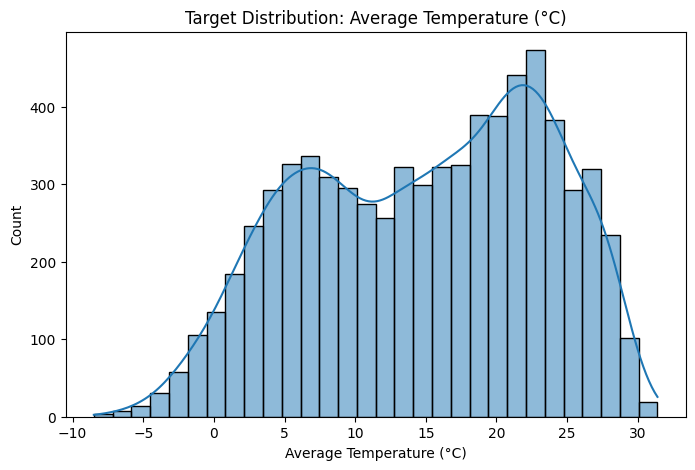

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['Average Temperature (°C)'], bins=30, kde=True)
plt.title("Target Distribution: Average Temperature (°C)")
plt.show()


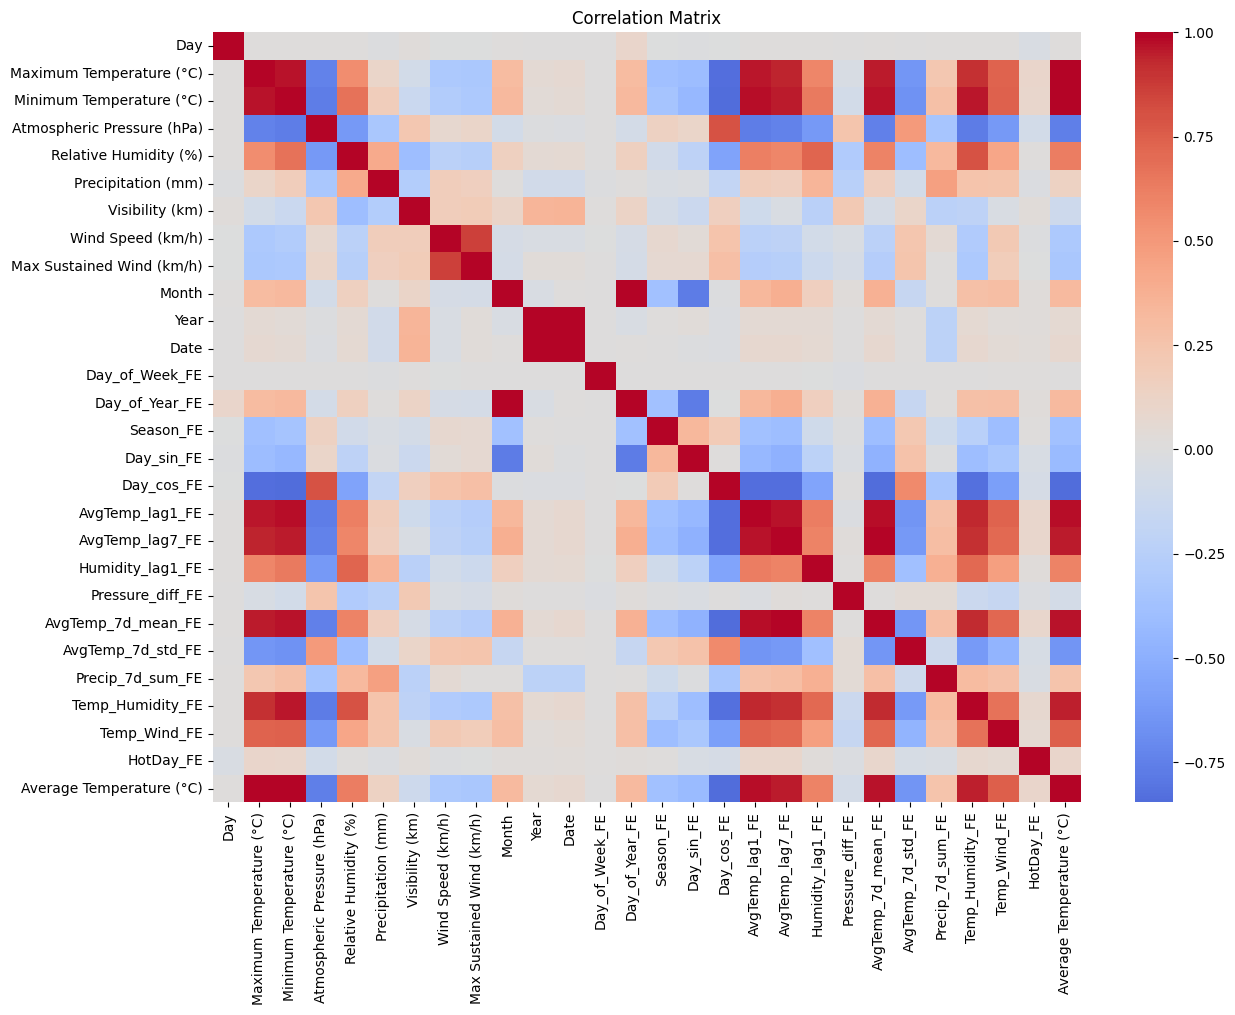

In [6]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()


In [7]:
print("Dataset shape:", df.shape)
print("Number of features:", df.shape[1]-1)
print("Target stats:\n", df['Average Temperature (°C)'].describe())


Dataset shape: (7183, 28)
Number of features: 27
Target stats:
 count    7183.000000
mean       14.946610
std         8.538505
min        -8.500000
25%         7.700000
50%        15.900000
75%        22.100000
max        31.400000
Name: Average Temperature (°C), dtype: float64


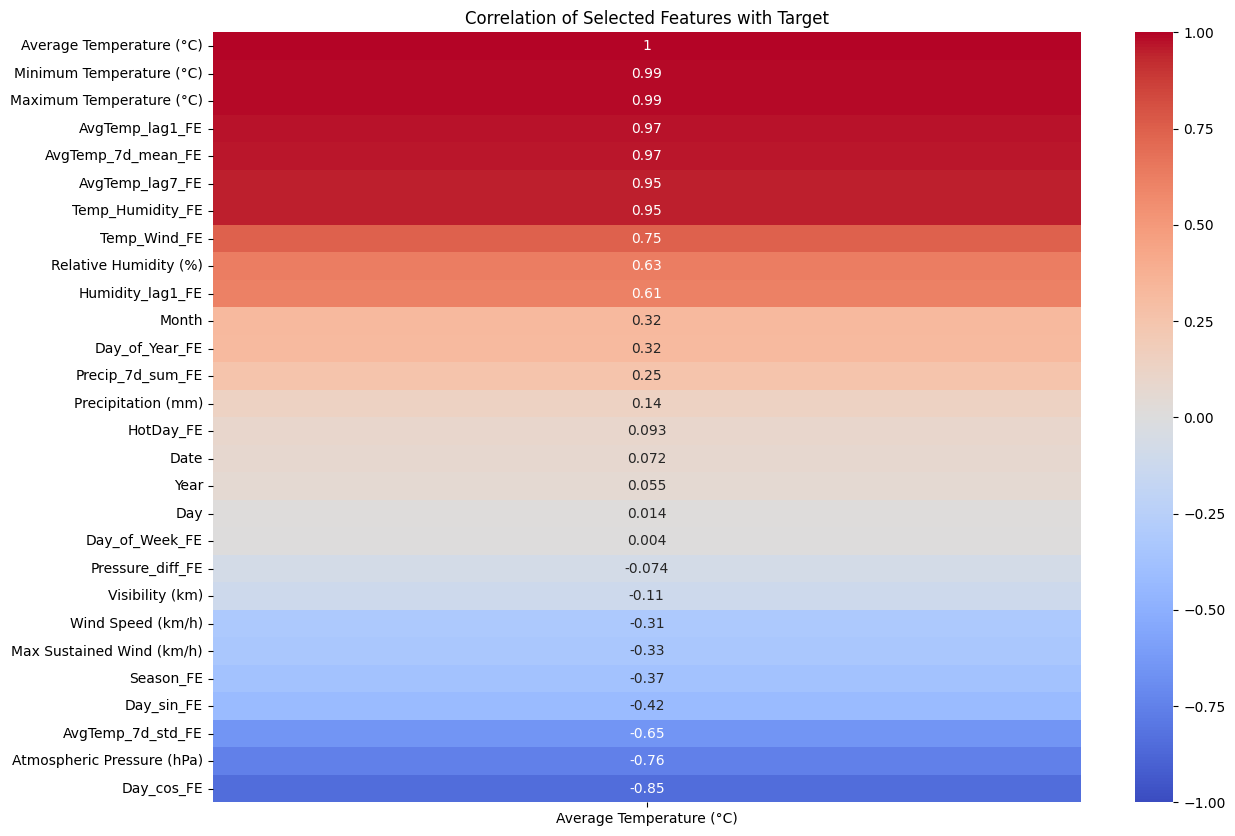

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr()[['Average Temperature (°C)']].sort_values(by='Average Temperature (°C)', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of Selected Features with Target")
plt.show()


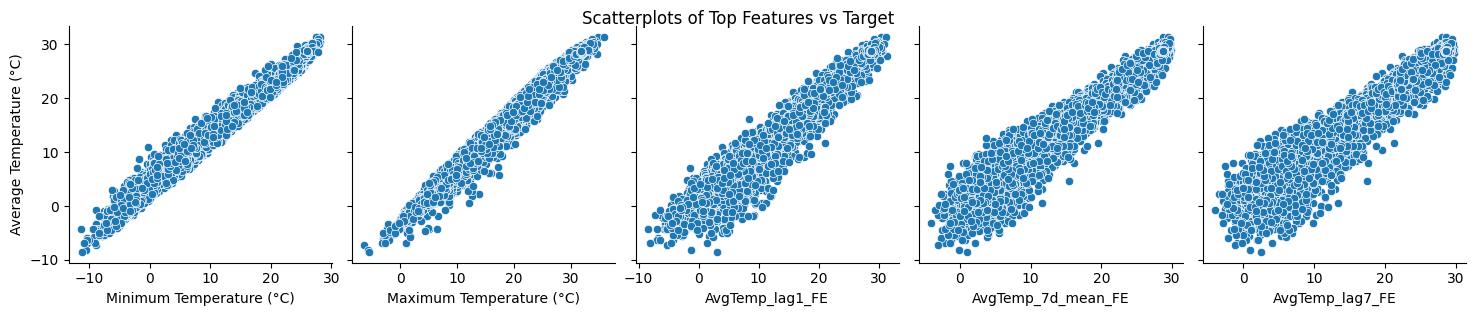

In [9]:
top_features = df.corr()['Average Temperature (°C)'].abs().sort_values(ascending=False).index[1:6]

sns.pairplot(df, x_vars=top_features, y_vars='Average Temperature (°C)', height=3, kind='scatter')
plt.suptitle("Scatterplots of Top Features vs Target", y=1.02)
plt.show()


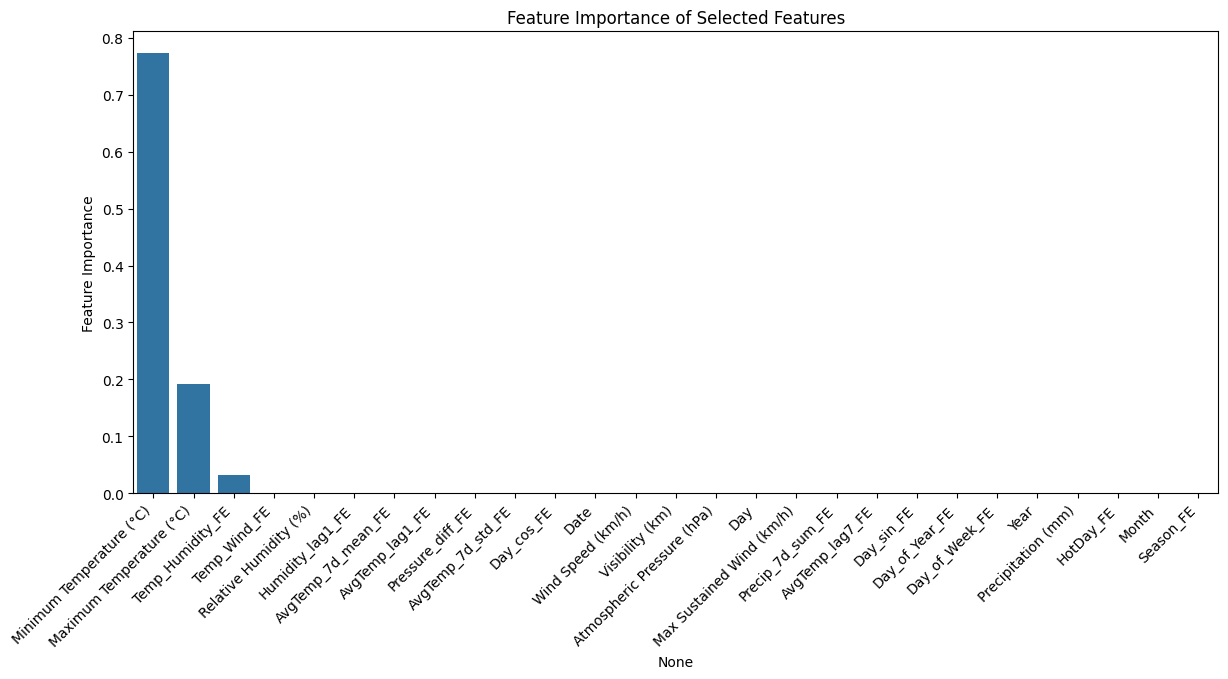

In [13]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['Average Temperature (°C)'])
y = df['Average Temperature (°C)']

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(14,6))
sns.barplot(x=importances.index, y=importances.values)  # default color
plt.xticks(rotation=45, ha='right')
plt.ylabel("Feature Importance")
plt.title("Feature Importance of Selected Features")
plt.show()
